     Object   X_value   Y_value
0  Object 1  1.005079  4.594642
1  Object 2  1.128478  4.328122
2  Object 3  2.117881  0.726845
3  Object 4  0.955626  4.385907
4  Object 5 -1.354017  2.769449
------------------------------------------------------------------


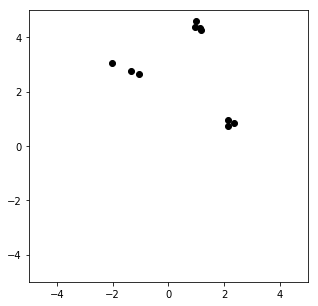

In [33]:
# source :
# https://blog.floydhub.com/introduction-to-k-means-clustering-in-python-with-scikit-learn/

# Imports
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

# Generate 2D data points
X, _ = make_blobs(n_samples=10, centers=3, n_features=2,
                 cluster_std=0.2,  random_state=0)

# Convert the data points into a pandas DataFrame
import pandas as pd

# Generate indicators for the data points
obj_names = []
for i in range(1, 11):
    obj = "Object " + str(i)
    obj_names.append(obj)

# Create a pandas DataFrame with the names and (x, y) coordinates
data = pd.DataFrame({
    'Object': obj_names,
    'X_value': X[:, 0],
    'Y_value': X[:, -1]
})

# Preview the data
print(data.head())
print ("------------------------------------------------------------------")

fig = plt.figure(figsize=(5, 5))
plt.scatter(data['X_value'], data['Y_value'], color='k')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

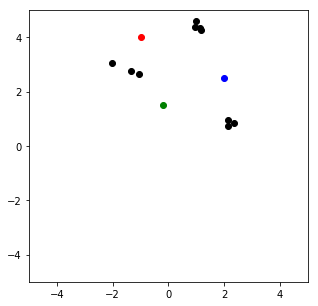

In [34]:
# Initialize the centroids
c1 = (-1, 4)
c2 = (-0.2, 1.5)
c3 = (2, 2.5)
centroids = {1: [-1, 4], 2: [-0.2, 1.5], 3: [2, 2.5]}

fig = plt.figure(figsize=(5, 5))
plt.scatter(data['X_value'], data['Y_value'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

In [35]:
# A helper function to calculate the Euclidean diatance between the data 
# points and the centroids

def calculate_distance(centroid, X, Y):
    distances = []
        
    # Unpack the x and y coordinates of the centroid
    c_x, c_y = centroid
        
    # Iterate over the data points and calculate the distance using the           # given formula
    for x, y in list(zip(X, Y)):
        root_diff_x = (x - c_x) ** 2
        root_diff_y = (y - c_y) ** 2
        distance = np.sqrt(root_diff_x + root_diff_y)
        distances.append(distance)
        
    return distances

In [36]:
import numpy as np
# Calculate the distance and assign them to the DataFrame accordingly
data['C1_Distance'] = calculate_distance(c1, data.X_value, data.Y_value)
data['C2_Distance'] = calculate_distance(c2, data.X_value, data.Y_value)
data['C3_Distance'] = calculate_distance(c3, data.X_value, data.Y_value)

# Preview the data
print(data.head())

     Object   X_value   Y_value  C1_Distance  C2_Distance  C3_Distance
0  Object 1  1.005079  4.594642     2.091397     3.320997     2.318921
1  Object 2  1.128478  4.328122     2.153620     3.124601     2.025236
2  Object 3  2.117881  0.726845     4.520479     2.443428     1.777070
3  Object 4  0.955626  4.385907     1.993339     3.108686     2.155774
4  Object 5 -1.354017  2.769449     1.280462     1.715592     3.364823


In [37]:
    # Get the minimum distance centroids
    data['Cluster'] = data[['C1_Distance', 'C2_Distance', 'C3_Distance']].apply(np.argmin, axis =1)
    
    # Map the centroids accordingly and rename them
    data['Cluster'] = data['Cluster'].map({'C1_Distance': 'C1', 'C2_Distance': 'C2', 'C3_Distance': 'C3'})
    
    # Get a preview of the data
    print(data.head(10))

      Object   X_value   Y_value  C1_Distance  C2_Distance  C3_Distance  \
0   Object 1  1.005079  4.594642     2.091397     3.320997     2.318921   
1   Object 2  1.128478  4.328122     2.153620     3.124601     2.025236   
2   Object 3  2.117881  0.726845     4.520479     2.443428     1.777070   
3   Object 4  0.955626  4.385907     1.993339     3.108686     2.155774   
4   Object 5 -1.354017  2.769449     1.280462     1.715592     3.364823   
5   Object 6 -1.072953  2.627009     1.374928     1.425551     3.075577   
6   Object 7 -2.037502  3.048606     1.407679     2.403038     4.074603   
7   Object 8  2.354083  0.856632     4.596807     2.633869     1.681081   
8   Object 9  2.144040  0.964399     4.370339     2.404453     1.542342   
9  Object 10  1.166288  4.273516     2.183487     3.091785     1.959703   

  Cluster  
0      C1  
1      C3  
2      C3  
3      C1  
4      C1  
5      C1  
6      C1  
7      C3  
8      C3  
9      C3  


In [38]:
# Calculate the coordinates of the new centroid from cluster 1
x_new_centroid1 = data[data['Cluster']=='C1']['X_value'].mean()
y_new_centroid1 = data[data['Cluster']=='C1']['Y_value'].mean()

# Calculate the coordinates of the new centroid from cluster 2
x_new_centroid2 = data[data['Cluster']=='C3']['X_value'].mean()
y_new_centroid2 = data[data['Cluster']=='C3']['Y_value'].mean()

# Print the coordinates of the new centroids
print('Centroid 1 ({}, {})'.format(x_new_centroid1, y_new_centroid1))
print('Centroid 2 ({}, {})'.format(x_new_centroid2, y_new_centroid2))

Centroid 1 (-0.500753347459331, 3.4851226841526897)
Centroid 2 (1.7821539902873855, 2.2299026522421928)


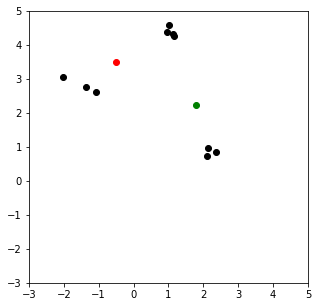

In [42]:
centroids = {1: [-0.500753347459331, 3.4851226841526897], 2: [1.7821539902873855, 2.2299026522421928]}

fig = plt.figure(figsize=(5, 5))
plt.scatter(data['X_value'], data['Y_value'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(-3, 5)
plt.ylim(-3, 5)
plt.show()